##Research Ideas:



**Predictive Modeling:**

>This dataset can be used to build a predictive model to predict whether a customer will subscribe to a term deposit or not.By analyzing the various features such as age, job, marital status, education, balance,and previous marketing campaign outcomes, the model can provide insights into the likelihood of subscription.


**Customer Segmentation:**

>The dataset can be used for customer segmentation analysis. By clustering customers based on their characteristics and behavior, banks can identify different segments of customers with varying propensities to subscribe to term deposits. This information can then be used to tailor marketing campaigns and strategies specific to each segment.


**Campaign Optimization:**

>The dataset can also be used for optimizing marketing campaigns. By analyzing the effectiveness of different
communication types (contact),number of contacts performed (campaign), duration of contact, and outcome of previous campaigns (poutcome),banks can gain insights into which strategies are most successful in driving subscriptions. This information can help in optimizing future campaign efforts for better results.



##Introduction to the Dataset:


####What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time

- **Independent Features**

**1. age -** 	The age of the customer. (Numerical)

**2. job -**	The occupation/employment status of the customer. (Categorical:'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

**3. marital -** 	The marital status of the customer. (Categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

**4. education -** 	The education level attained by the customer. (Categorical: primary, secondary, tertiary and unknown)

**5. default -** 	Whether the customer has credit in default or not. (Categorical:  'no','yes','unknown')

**6. balance** 	The balance in the customer's account. (Numerical)

**7. housing -** 	Whether the customer has a housing loan or not. (Categorical: 'no','yes','unknown')

**8. loan -** has personal loan? (categorical: 'no','yes','unknown')

**9. contact -** 	Type of communication used to contact customers (phone, cellular, etc.). (Categorical)

**10. day -** 	Day of the month when customers were last contacted. (Numerical)

**11. month -**  last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

**12. duration -** 	Duration (in seconds) of the last contact with customers during the previous campaign. (Numerical)

**13. campaign -** number of contacts performed during this campaign and for this client (numeric, includes last contact)

**14. pdays -** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**15. previous -** number of contacts performed before this campaign and for this client (numeric)

**16. poutcome -** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


- *Output variable (desired target):*

**17. deposit** - has the client subscribed a term deposit? (binary: 'yes','no')

##Import the necessary **Libraries**:

In [2]:
#Importing the Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# To Filter DeprecationWarning
from warnings import filterwarnings
filterwarnings('ignore', category=DeprecationWarning)

# For Encoding/Standardization:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import CategoricalDtype

# To Find Best Modeland Its Score:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold

# To Streamline all the ML-Process:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classification Models:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier

# Evaluation Metrics - Classification:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve,roc_curve

# To Save/Load the Model:
import joblib

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank Campaign Optimization: Targeting Term Deposit Customers/Datasets/train.csv',
                 sep=';')


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.rename({'y':'deposit'},axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Observation:**
  - **Info** shows there are no missing values.

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


###Summary of Descriptive Statistics:
---

---

1. **Age:**
   - The age of customers is in the range between 18 and 95 years,with a mean of approximately 41 years.
   - The majority of customers fall between the ages of 33 and 48, as indicated by the 25th to 75th percentiles.

2. **Balance:**
   - The average balance is 1362 with standard deviation of 3044 indicating a diverse distribution of account balances(between -8019(negative value) and 102127).

  
3. **Day:**
   - We can observe interactions throughout the month,but the majority of the interactions occurred in 2nd and 3rd week of a month. .

4. **Duration:**
   - The average duration of contact with customers is approximately 258 seconds with standard deviation of 257 seconds indicates duration varies widely	 .
   - The minimum duration is 0 seconds indicating there are customers has not been contacted by any means, and the maximum duration is 4918 seconds.

5. **Campaign:**
   - On average, customers were contacted in around 2.7 campaigns.
   - The minimum number of campaigns is 1, and the maximum is 63, suggesting variations in the outreach efforts.

6. **Pdays:**
   - A negative value (-1) indicates that the customer was not previously contacted.
   - The majority of customers have not been previously contacted,as indicated by the min to 75th percentiles being -1.

7. **Previous:**
   - The majority of customers have not been previously contacted, as indicated by the min to 75th percentiles being 0. Means this is thier first contact.



**Distribution of Term Deposits:**

    1. What is the overall distribution of term deposits ('y') in the dataset?
    2. How many customers have taken a term deposit, and how many have not?

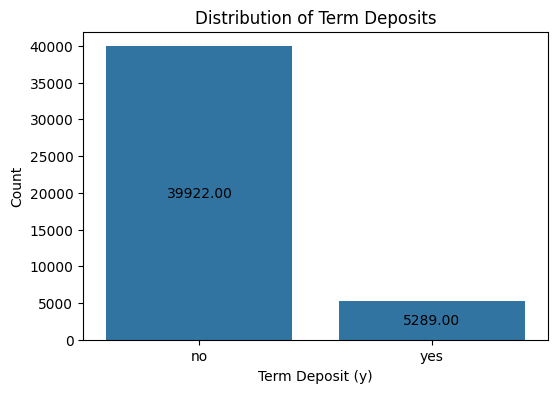

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='deposit', data=df)
for c in ax.containers:
  ax.bar_label(c, label_type='center',fmt='%.2f')
plt.title('Distribution of Term Deposits')
plt.xlabel('Term Deposit (y)')
plt.ylabel('Count')
plt.show()


**Observation:**
  - We can observe a moderately imblanced data(around 11% "YES" and 89% "NO")

 Explore the correlation of numerical features with the target variable.

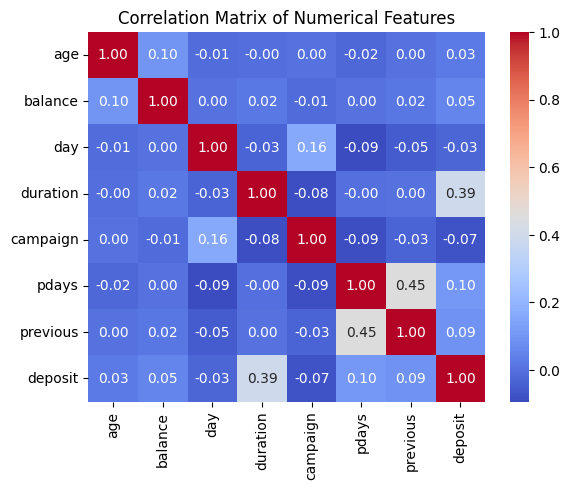

In [ ]:
# Correlation with numerical features
df_copy = df.copy()
df_copy['deposit'].replace({'yes':1,"no":0},inplace=True)

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit']

# Correlation matrix
correlation_matrix = df_copy[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Observation:**

  1. There is a high correlation between **duration** and **deposit** (+ve 0.39)
  2. There is a high correlation between **pdays** and **previous** (+ve 0.45)


##**Customer Segmentation:**

### **Q :** How does the average age differ for customers with and without term deposits?

In [ ]:
def age_bin(age):
  # based on data distribution i've created 3 groups

  if age <= 30:
    return '18-30'
  elif age > 31 and age <= 50 :
    return '31-50'
  else:
    return '51 and Above'

df['age_group'] = df['age'].apply(age_bin)

Median Age for Customers with Term Deposits(yes): 38.00
Median Age for Customers without Term Deposits(no): 39.00


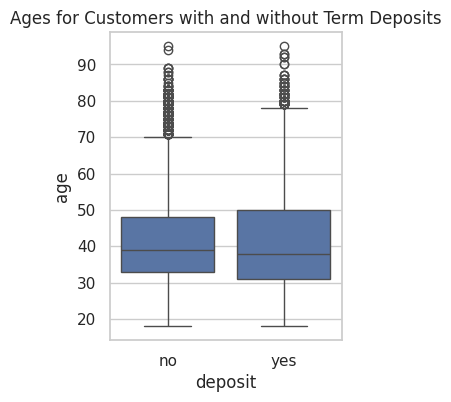

In [ ]:
# Filter data for customers with and without term deposits
with_deposit = df[df['deposit'] == 'yes']
without_deposit = df[df['deposit'] == 'no']

# Calculate average age for each group
avg_age_with_deposit = with_deposit['age'].median()
avg_age_without_deposit = without_deposit['age'].median()

sns.set(style="whitegrid")
plt.figure(figsize=(3, 4))
ax = sns.boxplot(x='deposit', y='age', data=df)
plt.title('Ages for Customers with and without Term Deposits')

print(f"Median Age for Customers with Term Deposits(yes): {avg_age_with_deposit:.2f}")
print(f"Median Age for Customers without Term Deposits(no): {avg_age_without_deposit:.2f}")

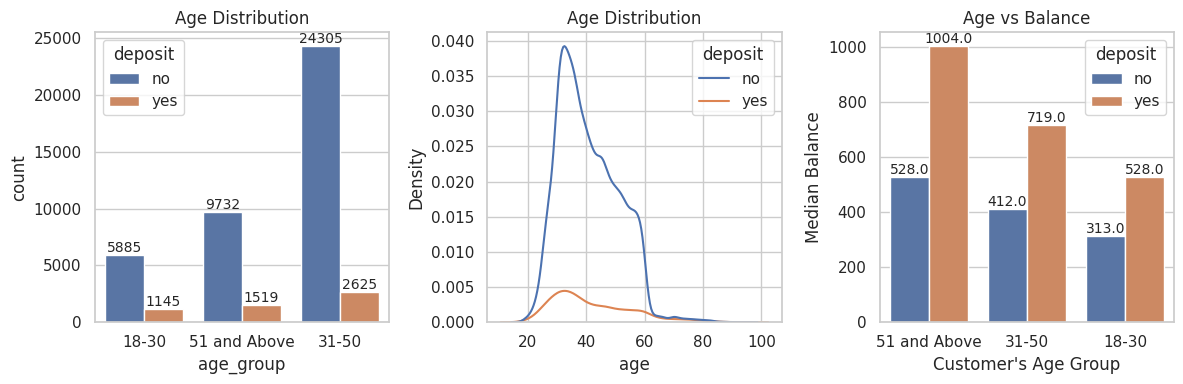

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(12,4))

sns.countplot(x='age_group',hue='deposit',data=df,order=df['age_group'].value_counts(ascending=True).index,ax=axes[0])
for c in axes[0].containers:
  axes[0].bar_label(c, label_type='edge',fmt='%d',fontsize=10)
axes[0].set_title("Age Distribution")

sns.kdeplot(x='age',hue='deposit',data=df,ax=axes[1])
axes[1].set_title("Age Distribution")

sns.barplot(x='age_group',y='balance',hue='deposit',data=df,errorbar=None,ax=axes[2],estimator=np.median)
for c in axes[2].containers:
  axes[2].bar_label(c,label_type='edge',fmt='%.1f',fontsize=10)
axes[2].set_xlabel("Customer's Age Group")
axes[2].set_ylabel('Median Balance')
axes[2].set_title("Age vs Balance")

fig.tight_layout()

**Observation:**
  - Customers from all age group subscribed for term deposit.
  - We can see more number of subscriptions in the age group 31-50 followedd by "51-above".The reason for that is,the majority of the customers in our data is between the age 30 and 60,which is evident from 2nd chart.
  - Also There is no significant difference between the mean age of customers with and without deposit.
  - May be age group doesn't play much role in tern deposit subscriptions.suggesting statistical tests to find its importance.
  - The customers who subscribed for term deposit tends to maintain more balance irrespective of age group.
  - May be balance play a vital role in term deposit subs.Suggesting more study on balance vs other factors.


### **Q :** Is there any significant difference in the balance for customers who subscribed to a term deposit?

In [ ]:
#identif and remove outliers:

# calculating IQR:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

#calulating lower and upper bound:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# removing outliers:
df_balance_no_outliers = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]
df_balance_outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]

In [ ]:
print(df_balance_no_outliers.shape[0] + df_balance_outliers.shape[0] == df.shape[0])

True


In [ ]:
out_yes = df_balance_no_outliers[df_balance_no_outliers['deposit'] == 'yes']
out_no = df_balance_no_outliers[df_balance_no_outliers['deposit'] == 'no']

no_out_yes = df[df['deposit']=='yes']
no_out_no = df[df['deposit']=='no']

print("After removing outliers:Median Balance")
print("Deposit(yes): ",out_yes['balance'].median())
print("Deposit(no): ",out_no['balance'].median())
print(f"yes group maintains {(100*(out_yes['balance'].median() - out_no['balance'].median())/out_no['balance'].median()) :.2f}%,more than no group\n")

print("with outliers:Median Balance")
print("Deposit(yes): ",no_out_yes['balance'].median())
print("Deposit(no): ",no_out_no['balance'].median())
print(f"yes group maintains {(100*(no_out_yes['balance'].median() - no_out_no['balance'].median())/no_out_no['balance'].median()):.2f}%,more than no group")

After removing outliers:Median Balance
Deposit(yes):  535.5
Deposit(no):  328.0
yes group maintains 63.26%,more than no group

with outliers:Median Balance
Deposit(yes):  733.0
Deposit(no):  417.0
yes group maintains 75.78%,more than no group


NOTE:
1. We can't eliminate the possibility of **Rich Customers**,hence extreme balance value might not be outliers.

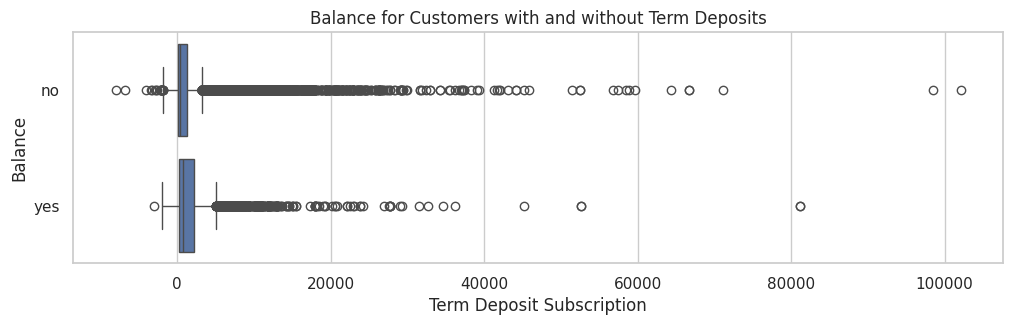

In [ ]:
plt.figure(figsize=(12, 3))
sns.boxplot(y='deposit', x='balance', data=df)
plt.title('Balance for Customers with and without Term Deposits')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Balance')
plt.show()

**Observation:**
  - Customers with term deposit subscription maintains more average balance than customers with out term deposit subscription.

**Q :** Balance distribution with respect to education levels,profession and term deposit subscription


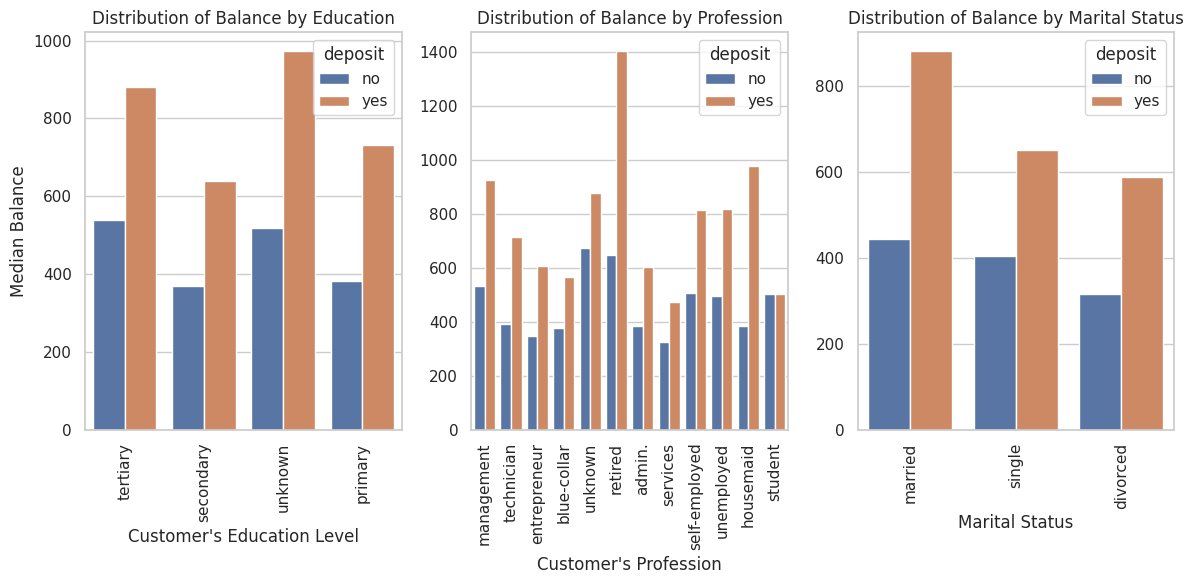

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.barplot(x="education", y="balance", hue="deposit", data=df,errorbar=None,estimator=np.median)
plt.xlabel("Customer's Education Level")
plt.ylabel('Median Balance')
plt.xticks(rotation=90)
plt.title('Distribution of Balance by Education')


plt.subplot(1,3,2)
sns.barplot(x="job", y="balance", hue="deposit", data=df,errorbar=None,estimator=np.median)
plt.xlabel("Customer's Profession")
plt.ylabel('')
plt.xticks(rotation=90)
plt.title('Distribution of Balance by Profession')

plt.subplot(1,3,3)
sns.barplot(x="marital", y="balance", hue="deposit", data=df,errorbar=None,estimator=np.median)
plt.xlabel("Marital Status")
plt.ylabel('')
plt.xticks(rotation=90)
plt.title('Distribution of Balance by Marital Status')

# plt.suptitle('Mean Balance Distribution wrt Profession, Education Levels and Marital Status')
plt.tight_layout()
plt.show()

**Observation:**
  - Despite the difference in  education levels, profession and marital status, all customers with term deposit maintains more average balance
  - Retired,followed by Management and self-employed maintains more balance

###**Q :** How "Housing" and "Loan" affects term deposit subscription?

Text(0, 0.5, 'Count')

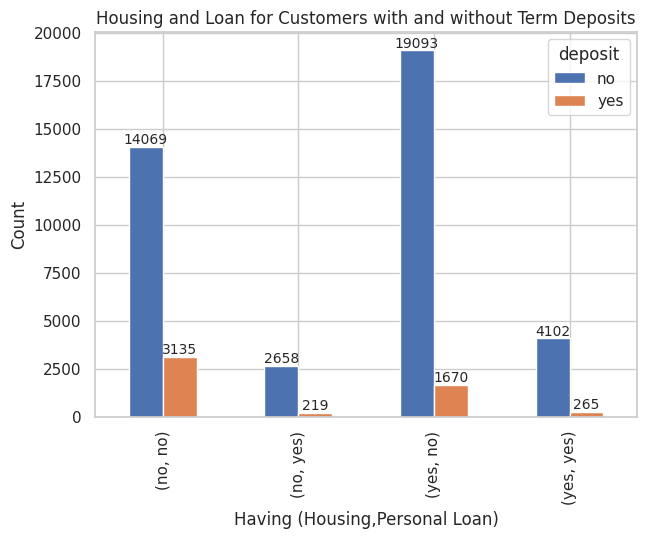

In [ ]:
title = "Housing and Loan for Customers with and without Term Deposits"
# xticks = ['no loans','only personal','only housing','both loans']
ax=df.groupby('housing')[['loan','deposit']].value_counts().unstack().plot(kind='bar',title=title,figsize=(7,5) )
for c in ax.containers:
  ax.bar_label(c,label_type='edge',fmt='%d',fontsize=10)

# ax.set_title()
ax.set_xlabel('Having (Housing,Personal Loan)')
ax.set_ylabel('Count')




**Bayesian probabilty:**
```
  p(A|B) = [P(B|A).P(A)]/[P(B)]
```
 -------------------------------------
   ```
   P(deposit| no loan) = {P(having no loan|having a deposit) . P(having term deposit)} / P(having no loan)

   P(having no loan|having a deposit)  = Count(term deposit with no loan ) / Count(all having deposit(total term deposit))

   P(having term deposit) = Count(all having deposit(total term deposit) / Count(total customers)

   P(having no loan) = Count(having no loan) / Count(total customers)
  ```

  ```
  if we substitue,we get:
    P(deposit| no loan) = Count(term deposit with no loan ) / Count(having no loan)
                        = 3135 / (14069+3135)
                        = 18.22 ~= 18%
    P(deposit|only housing) = 1670 / (19093+1670) = 8.04 ~= 8%
  
    P(deposit|only personal) = 219 / (406+219) = 7.61 ~= 7.5%

    P(deposit|both loan) = 265 / (4102+265) = 6.06 ~= 6%

  ```
  ---
  
**Observation:**
   1. There is a 18% chance that a customer wil buy a subscription for a term deposit if he/she doesn't have any kind of loan.
   2. The probability that a customer wil buy a subscription reduceds drastically to around 8% (almost 56% decreased) to 6% ,if that customer has any kind of loan(only housing|only personal loan|both housing and personal loan)


>  Out of all the customers with term deposit subscription,around 60% has no loan(any kind) and 37% has housing loan.

so,the features "housing" and "loan" may plays a significant role in predicting, whether a customer will subscribe to a term deposit  or not





###**Q:** How Marital status influences other factors in buying Term deposit subscription

<ipython-input-139-2a75d35482a3>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('marital').median()['balance'].plot.bar()


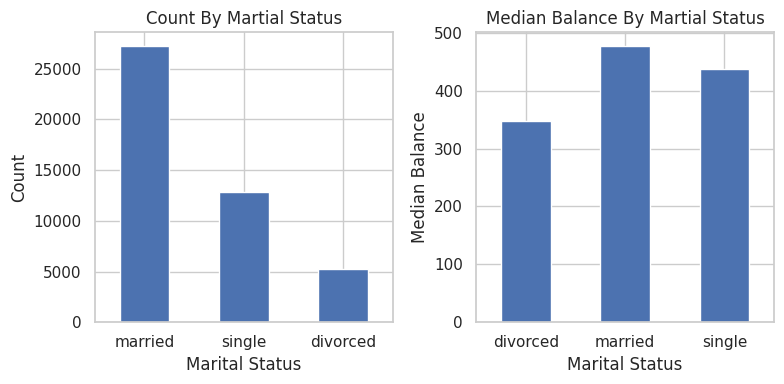

In [ ]:
fig = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
df['marital'].value_counts().plot.bar()
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count By Martial Status')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
df.groupby('marital').median()['balance'].plot.bar()
plt.xlabel('Marital Status')
plt.ylabel('Median Balance')
plt.title('Median Balance By Martial Status')
plt.tight_layout()

plt.xticks(rotation=0)
fig.tight_layout()
plt.show()

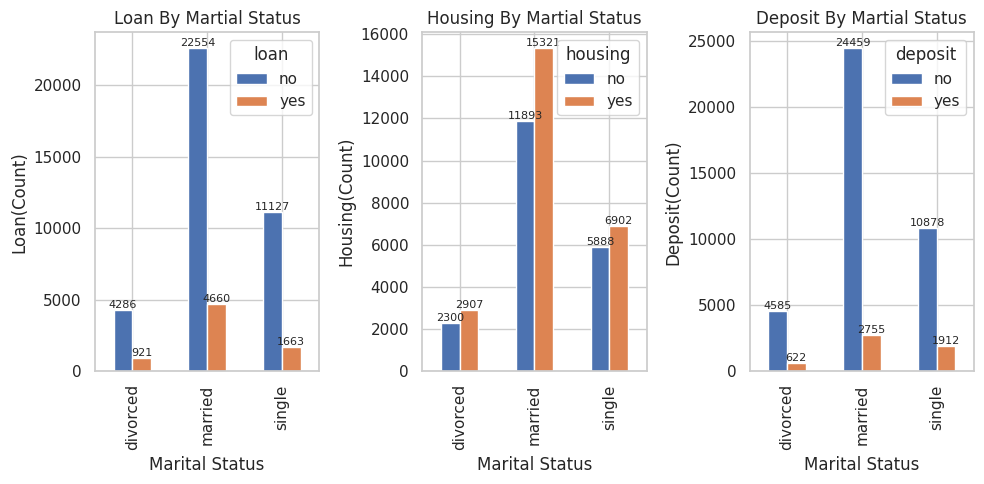

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(10,5))
df.groupby('marital')['loan'].value_counts().unstack().plot(kind='bar',ax=axes[0])
# pd.crosstab(df['marital'],df['loan']).plot.bar()
for c in axes[0].containers:
  axes[0].bar_label(c,label_type='edge',fmt='%d',fontsize=8)
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Loan(Count)')
axes[0].set_title('Loan By Martial Status')

df.groupby('marital')['housing'].value_counts().unstack().plot(kind='bar',ax=axes[1])
for c in axes[1].containers:
  axes[1].bar_label(c,label_type='edge',fmt='%d',fontsize=8)
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Housing(Count)')
axes[1].set_title('Housing By Martial Status')

df.groupby('marital')['deposit'].value_counts().unstack().plot(kind='bar',ax=axes[2])
for c in axes[2].containers:
  axes[2].bar_label(c,label_type='edge',fmt='%d',fontsize=8)
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Deposit(Count)')
axes[2].set_title('Deposit By Martial Status')

plt.tight_layout()

**Observation:**
  1. If we take the count then married seems to have more deposit,but around 60% our customers are married,so its obvious that we see more count here.
  2. If we consider the percentage of customers in each category then,we can see that around 11% of Single and almost 12% of Divorced has term deposit than Married(around 10%).


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000'),
  Text(8000.0, 0, '8000')])

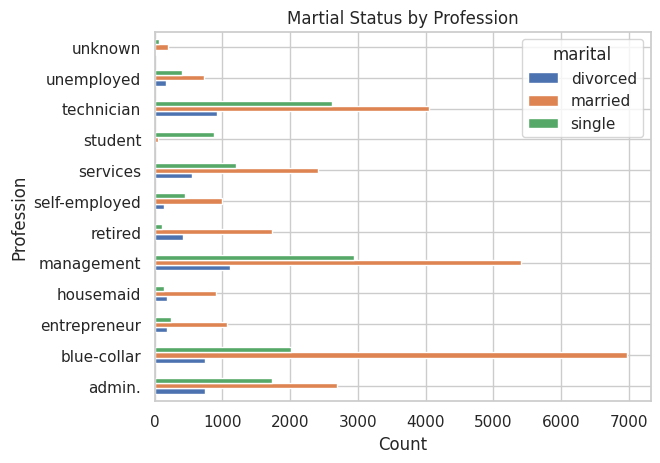

In [ ]:
df.groupby('job')['marital'].value_counts().unstack().plot.barh()
plt.xlabel('Count')
plt.ylabel('Profession')
plt.title('Martial Status by Profession')
plt.xticks(rotation=0)

**Observation**:
  - Out of all the customers around 56% having housing loan,in which married holds the maximum followed single
  - Maximum term deposit subscription is bought by Married followed by single.
  - From the last chart we can conclude that,Majority of all professinons is Married followed by single except student category in which 90% are single.
  - We know that 90% of our customer is either married or single,hence no wonder in observing these values.
  - All the customers who has term deposit maintains more average balance than others.
  - Insted of **Marital or Education or Profession**, if we target who holds ** Balance** and **Housing Loans**,then the chances of converting them is high!
  - ~31% of Customers are not interested in any form of schemes(term deposit|housing loan|personal loan).
  

##**Campaign Optimization:**

###**Q:** Best means of communication?

<Figure size 400x200 with 0 Axes>

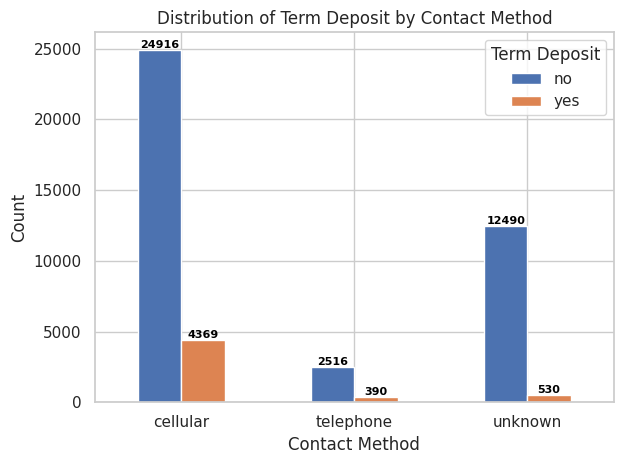

In [ ]:
best_contact = df.groupby('contact')['deposit'].value_counts().unstack()

plt.figure(figsize=(4, 2))
ax = best_contact.plot.bar()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black', weight='bold')

plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.title('Distribution of Term Deposit by Contact Method')
plt.legend(title='Term Deposit')
plt.xticks(rotation=0)
plt.tight_layout()

**Observation:**
1. Cellular seems to be the effective mode of communication,followed by telephone.

###**Q:** How contact "duration" affects deposit subscription?

In [ ]:
avg_duration = df['duration'].mean()
df['duration_category'] = df['duration'].apply(lambda x: 'above_avg' if x >= avg_duration  else 'below_avg')


Text(0.5, 1.0, 'Distribution of Duration by Deposit')

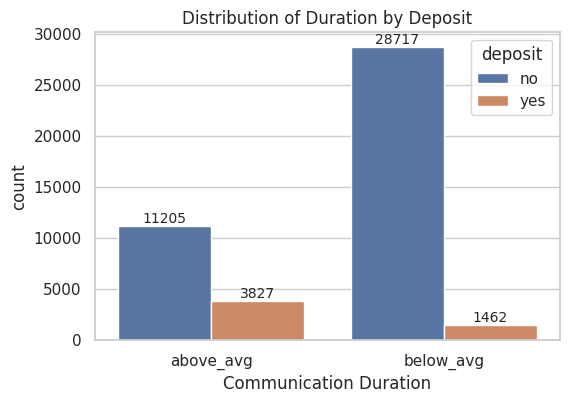

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='duration_category',data=df,hue='deposit')
for c in ax.containers:
  ax.bar_label(container=c,label_type='edge',fontsize=10)
ax.set_xlabel('Communication Duration')
ax.set_title('Distribution of Duration by Deposit')

**Observation:**

 1. We can observe ~34% of above_avg and ~5% of below_avg subscribed term deposit.
 > Higher the duration more the chance of convertion.

###**Q:** Influence of number Of contacts made with a customer in this campaign.

Text(0.5, 1.0, 'Distribution of Campaign by Deposit')

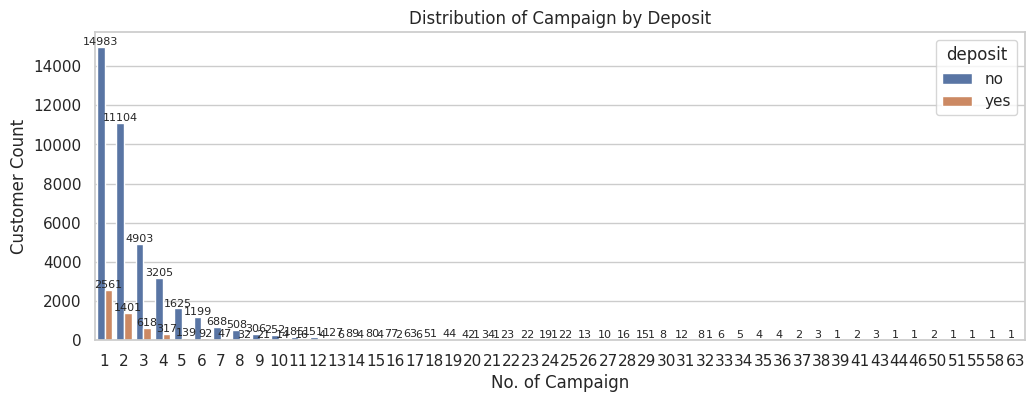

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='campaign',data=df,hue='deposit')
for c in ax.containers:
  ax.bar_label(container=c, label_type='edge',fontsize=8)
ax.set_xlabel('No. of Campaign')
ax.set_ylabel('Customer Count')
ax.set_title('Distribution of Campaign by Deposit')

**Observation:**

1. If the customer not buys term deposit subscription with in 3 contacts then it is less likely that a customer wil buy a term deposit subscription.


###**Q:** How the day of contact influences the conversion?

In [ ]:
def week(day):
  if day <= 7:
    return 'week_1'
  elif day >= 8 and day <= 14:
    return 'week_2'
  elif day >= 15 and day <= 21:
    return 'week_3'
  else:
    return 'week_4'

df['week of month'] = df['day'].apply(week)


Text(0.5, 1.0, 'Term Deposit by week of month')

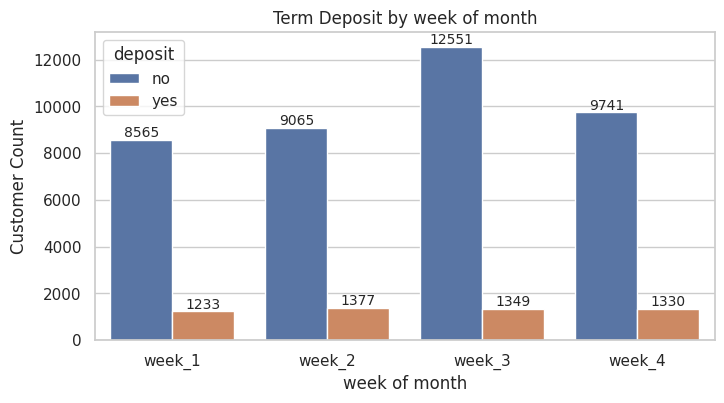

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='week of month',data=df,hue='deposit')
for c in ax.containers:
  ax.bar_label(container=c,label_type='edge',fontsize=10)
ax.set_xlabel('week of month')
ax.set_ylabel('Customer Count')
ax.set_title('Term Deposit by week of month')

**Observation:**
1. We can observe atleast 50% conversion during week-1 and week-2.
2. More numbers of contacts were made during week-3 followed by week-4,but the number of conversions almost remians the same(less efficient marketing).
3. Suggesting to communicate customers within week-1 or week-2 may increase the efficay of marketing.

###**Q:** How contact month influenes the deposit subscription.

In [ ]:
month_map = {'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'sep':9}
df['month_no'] = df['month'].map(month_map)


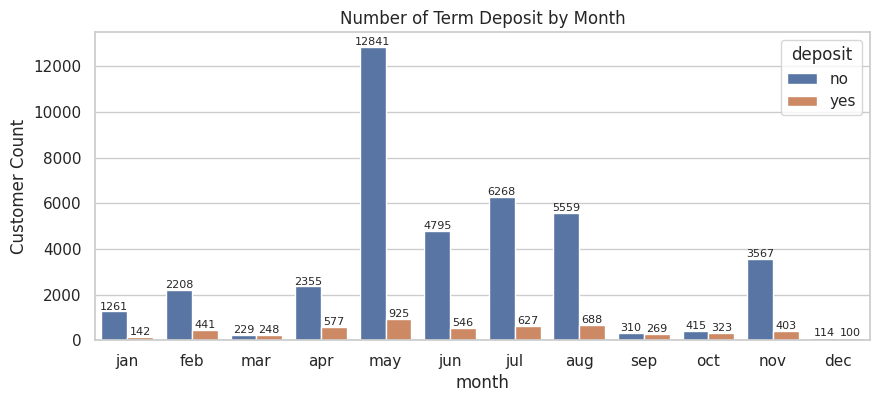

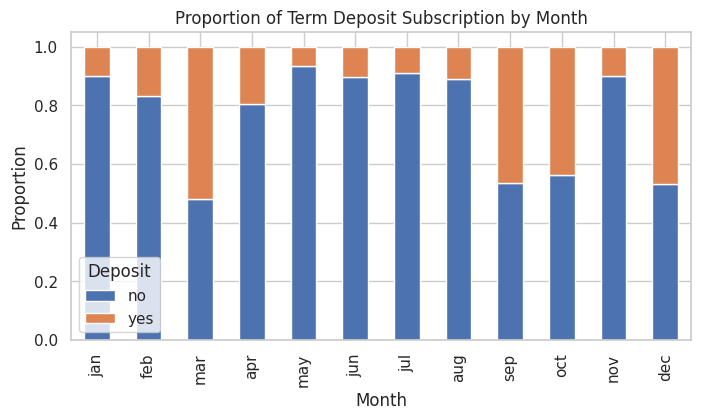

In [ ]:
plt.figure(figsize=(10,4))

# count chart
ax = sns.countplot(x='month',data=df,hue='deposit',order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
for c in ax.containers:
  ax.bar_label(container=c,label_type='edge',fontsize=8)
ax.set_xlabel('month')
ax.set_ylabel('Customer Count')
ax.set_title('Number of Term Deposit by Month')

# proportion chart
crosstab_month_deposit = pd.crosstab(df['month'], df['deposit'])
order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
proportions = crosstab_month_deposit.div(crosstab_month_deposit.sum(axis=1), axis=0).reindex(order)

proportions.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Proportion of Term Deposit Subscription by Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.legend(title='Deposit')

**Observation:**
1. The most number ofconversions happened in may,but less than 10%(of contacted) only bought the subscription,which shows the ineffictiveness of marketing team.

2. In terms of proportions, mar and dec shows the max conversion rate followed by sep,oct,apr and feb.But the number of contact made is low during these months.Suggesting to increase the marketing efforts during these periods.



##**Statistical Test:**



Applying Statistical Tests to know the significance of independent variables on target variable.

###**T-Test**

A t-test is a statistical test used to determine if there is a significant difference between the means of two groups(With and Without Term Deposit Subscription).

- Interpretation of T-Statistics:

    1. The t-statistic measures the difference between groups relative to the variability within groups.

    2. A larger absolute t-statistic suggests a more substantial difference between groups.


- Interpretation of P-Values:

    1. The p-value indicates the probability of observing the results (or more extreme) if the null hypothesis is true.
    2. Lower p-values indicate stronger evidence against the null hypothesis.

- Interpretation of Cohen's d:

   1. Cohen's d measures the standardized difference between group means.

   2. A larger absolute Cohen's d indicates a larger effect size.

   3. Values around 0.2 are considered small, 0.5 medium, and 0.8 or higher large.

In [ ]:
num_cols = ['age','balance','duration']
stats_results = {'features': num_cols,'t_statistic':[], 'p_value':[],'significant(p<0.05)':[],"cohens_d(effect size)":[]}

for col in num_cols:
  group1 = df[df['deposit'] == 'yes'][col]
  group2 = df[df['deposit'] == 'no'][col]

  t_statistic, p_val = stats.ttest_ind(group1,group2)

  stats_results['t_statistic'].append(t_statistic)
  stats_results['p_value'].append(p_val)

  significant = False
  if p_val < 0.05:
    significant = True
  stats_results['significant(p<0.05)'].append(significant)

  # Calculate Cohen's d
  mean_diff = np.mean(group1) - np.mean(group2)
  std1 = np.std(group1, ddof=1)
  std2 = np.std(group2, ddof=1)
  pooled_std = np.sqrt(((std1**2 + std2**2) / 2))

  cohens_d = mean_diff / pooled_std
  stats_results['cohens_d(effect size)'].append(cohens_d)


ttest_df=pd.DataFrame(stats_results).sort_values('cohens_d(effect size)',ascending=False)

print('T-Test Results: With and Without Term Deposit Subscription ')
print(ttest_df)

T-Test Results: With and Without Term Deposit Subscription 
   features  t_statistic       p_value  significant(p<0.05)  \
2  duration    91.289436  0.000000e+00                 True   
1   balance    11.250434  2.521114e-29                 True   
0       age     5.350255  8.825644e-08                 True   

   cohens_d(effect size)  
2               1.007001  
1               0.154094  
0               0.069538  


1.The larger t-statistic and Cohen's d in Test 3(duration) indicating that the variable "duration" may have a greater impact on the deposit subscription.

2.Suggesting to focus more on variables('duration','balance') in feature engineering.

###**Chi_square**

chi-square tests to examine whether there is a significant association between categorical variables.

- Interpretation of Chi_square test:
  1. Chi-square only measures the strength of the association.
  2. The strength of association indicates how much the values of one variable can provide information about the values of the other variable.
  3. A higher Chi-square value in a Chi-square test indicates a larger difference between the observed and expected counts, suggesting a stronger association between the two categorical variables.
  4. However, it doesn't necessarily mean that variable with larger chi2 value is more "important" in an absolute sense.Also the strength of association alone doesn't imply that one variable can predict the other.

- Interpretation of Cramer's V:

  1. Cramer's V  quantifying the strength of the association, giving you a measure that ranges from 0 to 1. where 0 indicates no association, and 1 indicates a perfect association.
  2.  This makes it easier to compare the strength of associations across different tables.
  3. Features with stronger associations might be more informative for predictive modeling.



In [ ]:
def cramers_v(matrix,chi2_value):
  '''
    matrix =  contigency table's value: observed frequency
    chi2_value = chi-square value
    n = sum of the observed value(contigency table's value)
    returns--> cramers v value(0 to 1)
  '''
  n = matrix.sum()
  phi2 = chi2_value / n
  r, k = matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month']
stats_results = {'features': cat_cols,'chi2':[], 'p_value':[],'significant(p<0.05)':[],"cramers_v":[]}

for col in cat_cols:
  group1 = df[col]
  group2 = df['deposit']

  g1_g2_crosstab = pd.crosstab(group1, group2)

  chi2, p_value, _, _ = stats.chi2_contingency(g1_g2_crosstab)
  stats_results['chi2'].append(chi2)
  stats_results['p_value'].append(p_value)

  significant = False
  if p_value < 0.05:
    significant = True
  stats_results['significant(p<0.05)'].append(significant)

  cramers_v_value = cramers_v(matrix=g1_g2_crosstab.values,chi2_value=chi2)
  stats_results['cramers_v'].append(cramers_v_value)

chi2_df=pd.DataFrame(stats_results)

print('Chi-square Results: With and Without Term Deposit Subscription ')
print(chi2_df.sort_values('cramers_v',ascending=False))

Chi-square Results: With and Without Term Deposit Subscription 
    features         chi2        p_value  significant(p<0.05)  cramers_v
7      month  3061.838938   0.000000e+00                 True   0.259772
6    contact  1035.714225  1.251738e-225                 True   0.151211
4    housing   874.822449  2.918798e-192                 True   0.139025
0        job   836.105488  3.337122e-172                 True   0.135094
2  education   238.923506   1.626656e-51                 True   0.072238
5       loan   209.616980   1.665061e-47                 True   0.067929
1    marital   196.495946   2.145100e-43                 True   0.065590
3    default    22.202250   2.453861e-06                 True   0.021656


The variable 'month' has the highest Cramer's V (0.3046), indicating a relatively strong association with the target.Also 'contact', 'housing' and 'job', have relatively moderate associations.

>Suggesting to focus more on these variables in feature engineering.

##**Predictive Modeling:**

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
# drop unwanted columns:
df.drop(['age_group', 'duration_category','week of month', 'month_no'],
        axis=1,inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df['deposit'] = df['deposit'].replace({'no':0, 'yes':1})

In [7]:
# Split the dependent and independent variables.
df_target = df['deposit']
df_features = df.drop('deposit',axis=1)

In [ ]:
# Filter numerical and categorical variables.
df_num = df_features.select_dtypes(include=np.number)
df_cat = df_features.select_dtypes(exclude=np.number)

In [ ]:
df_num.columns



Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
df_cat.columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

###**Split the data into  trian and test set:**

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df_features,  df_target, test_size = 0.2, random_state=1)


###**Encoding categorical data:**

In [ ]:
print(f'Total no. of categorical columns: {len(df_cat.columns)}\n')
print('*'*100)
for name in df_cat.columns:
  print("Column Name:",name)
  print('No. of Labels:',df[name].nunique())
  print("Column Labels:",df[name].unique())
  print('-'*100)
print('*'*100)

Total no. of categorical columns: 9

****************************************************************************************************
Column Name: job
No. of Labels: 12
Column Labels: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------------------------------------------------------------------
Column Name: marital
No. of Labels: 3
Column Labels: ['married' 'single' 'divorced']
----------------------------------------------------------------------------------------------------
Column Name: education
No. of Labels: 4
Column Labels: ['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------------------------------------------------------------------
Column Name: default
No. of Labels: 2
Column Labels: ['no' 'yes']
----------------------------------------------------------------------------------------------------
Column 

In [12]:
# circular encoding: month
def circular_encoding(data):
  # month_map
  month_map= {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
  data['month'] = data['month'].map(month_map)
  #circular transformation
  data['month_sin'] = np.sin(2 * np.pi * data['month'] / max(data['month']) )
  data['month_cos'] = np.cos(2 * np.pi * data['month'] / max(data['month']) )
  data = data.drop('month', axis=1)
  return data

circular_encoder = FunctionTransformer(func=circular_encoding,validate=False)


In [13]:
# Ordinal Encoding: Education column
def ordinal_encoding(data):
  # seting the orders of our ordinal features
  edu_ord = CategoricalDtype(categories=['unknown','primary','secondary','tertiary'], ordered=True)
  # Transforming ordinal Features
  data['education'] = data['education'].astype(edu_ord)
  # Geting the codes of ordinal category's and
  # replace the original values with corresponding codes
  data['education'] = data['education'].cat.codes

  return data

ordinal_encoder = FunctionTransformer(func=ordinal_encoding,validate=False)

In [14]:
# label encoding for boolen columns: Default,Housing,Loan
def label_encoding(data):
  bool_map = {'yes': 1, "no":0}
  for feature in data:
    data[feature] = data[feature].map(bool_map)

  return data

label_encoder = FunctionTransformer(func=label_encoding,validate=False)



In [15]:
# # one hot encoding: Job,Martial,Poutcome
pd.set_option('display.max_columns', None)

def custom_get_dummies(onehot_cols):
  #onehot_cols = ['job','marital','poutcome','contact']
  data = pd.get_dummies(onehot_cols,drop_first=True,sparse=True)
  # Combine the encoded DataFrame with the non-encoded columns
  # columns_to_keep = df.columns.difference(one_hot_columns)
  # final_df = pd.concat([encoded_df, df[columns_to_keep]], axis=1)
  return data

custom_get_dummies_encoder =  FunctionTransformer(func=custom_get_dummies,validate=False)


###**Feature Scaling:**



**Standardization (Z-score normalization):**
- Scales the features to have a mean of 0 and a standard deviation of 1.

**Robust Scaling:**
- Similar to Standardization but uses the median and interquartile range (IQR) instead of the mean and standard deviation.
- Particularly useful when dealing with outliers

**Adopted Strategy:**
- For numeric attributes like 'age' and 'balance' that exhibit outliers, adopting Robust Scaling is recommended for more reliable results.
- In the case of other numeric attributes, Standardization is employed.

###**Preprocessor Definition:** ColumnTransformer object

In [16]:
# Define the columns to be processed by the FunctionTransformers
circular_encoding_columns = ['month']
ordinal_encoding_columns = ['education']
label_encoding_columns = ['default','housing','loan']
custom_get_dummies_columns = ['job','marital','poutcome','contact']
robust_scaler_columns = ['age','balance']

# Create a ColumnTransformer to preprocess the features
preprocessor = ColumnTransformer(
    transformers=[('circular_encoding', circular_encoder, circular_encoding_columns),
                  ('ordinal_encoding', ordinal_encoder, ordinal_encoding_columns),
                  ('label_encoding', label_encoder, label_encoding_columns),
                  ('custom_get_dummies', custom_get_dummies_encoder, custom_get_dummies_columns),
                  ('robust_scaler',RobustScaler(),robust_scaler_columns)
                  ],
    remainder=StandardScaler()
    )



In [ ]:
#to know the hyperparameters name:
# from sklearn import set_config
# set_config(display='diagram')

# model = LogisticRegression()
# pipeline = Pipeline([
#       ('preprocessor', preprocessor),
#       ('model', model)
#   ])
# display(pipeline)
# print(pipeline.get_params())
# print(pipeline.get_params().keys())
# print(pipeline.get_params()['key of the value you want'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('circular_encoding',
                                                  FunctionTransformer(func=<function circular_encoding at 0x7d38881aeef0>),
                                                  ['month']),
                                                 ('ordinal_encoding',
                                                  FunctionTransformer(func=<function ordinal_encoding at 0x7d38881afbe0>),
                                                  ['education']),
                                                 ('label_encoding',
                                                  FunctionTransformer(func=<function label_encoding at 0x7d38881ad870>),
                                                  ['default', 'housing',
                                                   'loan']),
                                                 ('custom_get_dummies',
                                                  FunctionTransformer(func=<function custom_get_dummies at 0x7d38881afd90>),
                                                  ['job', 'marital', 'poutcome',
                                                   'contact']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['age', 'balance'])])),
                ('model', LogisticRegression())])

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder__copy', 'preprocessor__remainder__with_mean', 'preprocessor__remainder__with_std', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__circular_encoding', 'preprocessor__ordinal_encoding', 'preprocessor__label_encoding', 'preprocessor__custom_get_dummies', 'preprocessor__robust_scaler', 'preprocessor__circular_encoding__accept_sparse', 'preprocessor__circular_encoding__check_inverse', 'preprocessor__circular_encoding__feature_names_out', 'preprocessor__circular_encoding__func', 'preprocessor__circular_encoding__inv_kw_args', 'preprocessor__circular_encoding__inverse_func', 'preprocessor__circular_encoding__kw_args', 'preprocessor__circular_encoding__validate', 'preprocessor__ordinal_encoding__accept_sparse', 'preproc

###**Define Classification Models:**

**Linear Models:**

 These models create a linear decision boundary.

- *Logistic Regression and Linear Discriminant*

**Nonlinear Models:**

These models are capable of capturing nonlinear patterns in the data.
- *K-Nearest Neighbors, Decision Trees, Gaussian Naive Bayes, and Support Vector*

**Ensemble Methods (Bagging):**
- *RandomForestClassifier* is an example of a bagging ensemble method, where multiple decision trees are trained independently and their predictions are combined.

**Ensemble Methods (Boosting):**
- *GradientBoostingClassifier*  where weak learners (typically shallow trees) are trained sequentially, and each new learner corrects the errors of the previous ones.

In [10]:
# Create a dictionary of classifiers with their respective hyperparameter grids
classifiers = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='ovr'),
        'param_grid': {'model__C': [0.01, 0.1, 1, 10],
                      'model__penalty': ['l1', 'l2']}
    },

    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {'model__n_neighbors': [3, 5, 7, 10, 15],
                       'model__weights': ['uniform', 'distance']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'model__criterion': ['gini','entropy'],
                       'model__max_depth': [None, 5, 10, 20, 30],
                       'model__min_samples_split': [2, 5, 10],
                       'model__min_samples_leaf': [1, 2, 4] }
    },
    'Gaussian Naive Bayes': {'model': GaussianNB(),
                             'param_grid': {}
    },
    'SVM': {
        'model': SVC(gamma='auto'),
        'param_grid': {'model__C':[0.1, 1],
                       'model__kernel': ['linear', 'rbf'],
                       'model__gamma': ['auto', 'scale']}
    },
    'Random Forest' : {
        'model': RandomForestClassifier(),
        'param_grid':  {'model__n_estimators': [100, 150],
                        'model__max_depth': [None, 5, 10],
                        'model__min_samples_split': [2, 5],
                        'model__min_samples_leaf': [1, 2],
                        'model__class_weight': [None, 'balanced'],
                        'model__random_state': [42]}
    },
    'GradientBoosting' : {
        'model': GradientBoostingClassifier(),
        'param_grid': {'model__n_estimators': [100, 150],
                       'model__learning_rate': [0.01, 0.1, 0.2],
                       'model__max_depth': [3, 5],
                       'model__random_state': [42]}
}
}

###Find the **Best Model** and Its **Score** using **GridSearchCv** and **CrossValidationScore :**

**Objective:**

My aim is to construct a balanced model that minimizes false negatives (recall) to retain potential customers while simultaneously limiting false positives (precision).

To achieve this, I have chosen the F1-score as the scoring parameter for cross-validation.



- **F1-score:**
 >F1-score is particularly useful when there is an imbalance between the classes, as it represents the harmonic mean of precision and recall. It provides a balance between false positives and false negatives.

It is calculated using the formula:

  ```
F1 = (2 * Precision * Recall) / (Precision + Recall)
```

**ROC-AUC score:**

- ROC-AUC score evaluates the model's ability to distinguish between positive and negative instances across various decision thresholds.

- It is suitable for understanding the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity).

- However, ROC-AUC is  more concerned with the overall ability of the model to discriminate between the classes and are less focused on the specific balance between false positives and false negatives.

Hence,F1-score will be more appropriate scoring metric for our model.



**Note:**

---

**Dimensionality Reduction:** Reducing Dimensions in Sparse Data.

Following the encoding process, the dataset's column count expanded from 17 to 32. Consequently, I opted to explore dimensionality reduction techniques.

Given the sparsity of our data, I chose Truncated SVD, specifically designed for sparse matrices. However, the outcomes did not demonstrate improvement compared to the scenario without dimensionality reduction.


In [ ]:
best_model_name = ''
best_model_overall = None
best_hyperparameters = None
best_f1_score_mean = 0.0
best_roc_auc_score_mean = 0.0

cv_results_data = {'model':[], 'best_hyperparams':[], 'f1(mean)':[], 'f1(std)':[],
                   'roc-auc(mean)':[], 'roc-auc(std)':[]}

for model_name,model_data in classifiers.items():
  model = model_data['model']
  param_grid = model_data['param_grid']


  # Create a pipeline that includes data preprocessing and model
  pipeline = Pipeline([
      ('preprocessor', preprocessor),
      ('model', model)
  ])

  # Create a StratifiedKFold cross-validation object with 5 folds and stratification
  stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  # Create the GridSearchCV object
  grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=stratified_kf, scoring='f1',n_jobs=-1)

  # Fit the GridSearchCV object to the training data
  grid_search.fit(X_train,y_train)

  # Access the best hyperparameters
  best_params = grid_search.best_params_

  # Access the best model
  best_model = grid_search.best_estimator_
  # best model is a Pipelie Object

  # Evaluate the best model using cross_val_score
  f1_score_cv = cross_val_score(estimator=best_model, X=X_train, y=y_train, cv=stratified_kf, scoring ='f1', n_jobs=-1)
  roc_auc_score_cv= cross_val_score(estimator=best_model, X=X_train, y=y_train, cv=stratified_kf, scoring ='roc_auc', n_jobs=-1)

  # Calculate the mean score
  f1_mean = f1_score_cv.mean()
  roc_auc_mean = roc_auc_score_cv.mean()

  #Calculate the standard deviation of the scores
  f1_std = f1_score_cv.std()
  roc_auc_std = roc_auc_score_cv.std()

  #  add all results to cv_results_data to create a dataframe later.
  cv_results_data['model'].append(model_name)
  cv_results_data['best_hyperparams'].append(best_params)
  cv_results_data['f1(mean)'].append(f1_mean)
  cv_results_data['f1(std)'].append(f1_std)
  cv_results_data['roc-auc(mean)'].append(roc_auc_mean)
  cv_results_data['roc-auc(std)'].append(roc_auc_std)

  # select the best model based on f1 score
  if f1_mean > best_f1_score_mean:
    best_model_name = model_name
    best_model_overall = best_model
    best_hyperparameters = best_params
    best_f1_score_mean = f1_mean
    best_roc_auc_score_mean = roc_auc_mean

  print(f'{model_name},is processed!')


Logistic Regression,is processed!
K-Nearest Neighbors,is processed!
Decision Tree,is processed!
Gaussian Naive Bayes,is processed!
SVM,is processed!
Random Forest,is processed!
GradientBoosting,is processed!


In [ ]:
from pprint import pprint
print("="*100)
print("Best model based on f1 score:",best_model_name)
print("-"*100)
pprint("Best Hyperparameters:",best_hyperparameters)
print("-"*100)
print("Train f1 Score with the best model:",best_f1_score_mean)
print("-"*100)
print("Train roc-auc Score with the best model:",best_roc_auc_score_mean)
print("="*100)

In [ ]:
# create a cv results dataframe
cv_results_df = pd.DataFrame(data=cv_results_data).sort_values(by='f1(mean)', ascending=False)

# save th results into a df:
cv_results_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Bank Campaign Optimization: \
Targeting Term Deposit Customers/bank_clf_cv_results.csv',encoding='utf-8')

print(cv_results_df)

                  model                                   best_hyperparams  \
5         Random Forest  {'model__class_weight': 'balanced', 'model__ma...   
6      GradientBoosting  {'model__learning_rate': 0.2, 'model__max_dept...   
2         Decision Tree  {'model__criterion': 'entropy', 'model__max_de...   
0   Logistic Regression            {'model__C': 1, 'model__penalty': 'l1'}   
1   K-Nearest Neighbors  {'model__n_neighbors': 3, 'model__weights': 'd...   
4                   SVM  {'model__C': 1, 'model__gamma': 'scale', 'mode...   
3  Gaussian Naive Bayes                                                 {}   

   f1(mean)   f1(std)  roc-auc(mean)  roc-auc(std)  
5  0.608486  0.015340       0.933110      0.003259  
6  0.548911  0.016884       0.931233      0.002338  
2  0.501590  0.022989       0.879243      0.009890  
0  0.430190  0.021518       0.890439      0.006845  
1  0.429707  0.020426       0.788785      0.011145  
4  0.410675  0.017043       0.875778      0.011103  
3  0

<ipython-input-17-5fe78feb2cc1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1(mean)', y='model', data=cv_results_df,palette='pastel')


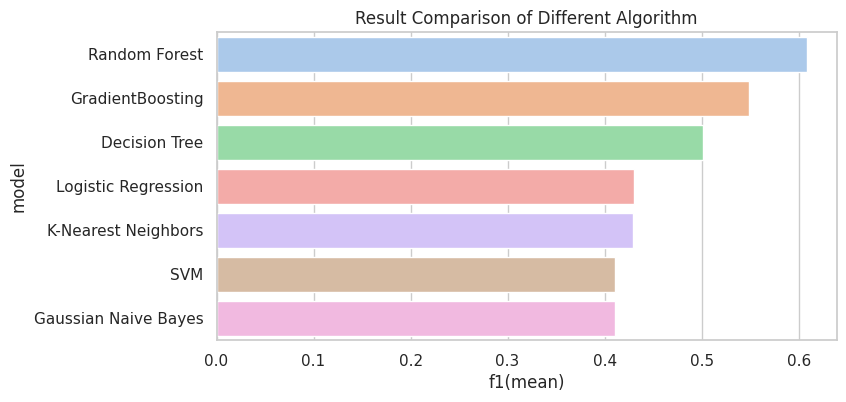

In [ ]:
# load the results df:
cv_results_df = pd.read_csv('cv_results_df')

# Compare the Results of Different Algorithms:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(8, 4))

ax = sns.barplot(x='f1(mean)', y='model', data=cv_results_df,palette='pastel')
for c in ax.containers:
  ax.bar_label(container=c,label_type='edge',fontsize=8,fmt='%.3f')
plt.xlabel('F1-score(mean)')
plt.ylabel('Models')
plt.xticks(rotation=0)
plt.title('Result Comparison of Different Algorithm')

# save the Algorithm Comparison chart:
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Bank Campaign Optimization: Targeting Term Deposit Customers/Algorithm Comparison(Train).png')

###**Train and Save the Best Model:**

In [ ]:
best_model_overall

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('circular_encoding',
                                                  FunctionTransformer(func=<function circular_encoding at 0x7bd3365e0c10>),
                                                  ['month']),
                                                 ('ordinal_encoding',
                                                  FunctionTransformer(func=<function ordinal_encoding at 0x7bd3365975b0>),
                                                  ['education']),
                                                 ('label_encoding',
                                                  FunctionTransformer(func=<function l...at 0x7bd3365e0d30>),
                                                  ['default', 'housing',
                                                   'loan']),
                                                 ('custom_get_dummies',
                                                  FunctionTransformer(func=<function custom_get_dummies at 0x7bd36dbe9000>),
                                                  ['job', 'marital', 'poutcome',
                                                   'contact']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['age', 'balance'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, min_samples_split=5,
                                        random_state=42))])

In [ ]:
# Train the best model with train data:
best_clf_model = best_model_overall.fit(X_train, y_train)

# save the model from disk
filename = '/content/drive/MyDrive/Colab Notebooks/Bank Campaign Optimization: Targeting Term Deposit Customers/best_model_clf.sav'
joblib.dump(best_clf_model, filename)

['/content/drive/MyDrive/Colab Notebooks/Bank Campaign Optimization: Targeting Term Deposit Customers/best_model_clf.sav']

In [17]:
filename = '/content/drive/MyDrive/Colab Notebooks/Bank Campaign Optimization: Targeting Term Deposit Customers/best_model_clf.sav'

# load the model from disk
loaded_model = joblib.load(filename)


###**Important features:**

In [ ]:
model_clf = loaded_model
classifier = model_clf.named_steps['model']
feature_importances = classifier.feature_importances_


In [ ]:
# an array of feature imporatnce
feature_importances

array([0.05425065, 0.0498778 , 0.01775362, 0.00081811, 0.03347354,
       0.00935386, 0.00783779, 0.00216521, 0.00176404, 0.0070255 ,
       0.00390236, 0.00263731, 0.00412496, 0.00357588, 0.00659181,
       0.00239449, 0.00042885, 0.00887198, 0.00729951, 0.00220062,
       0.03996441, 0.01024805, 0.00483513, 0.03521032, 0.06579897,
       0.06967172, 0.06581053, 0.39200084, 0.03043806, 0.03718194,
       0.02249214])

In [ ]:
transformed_feautres = ['month_sin',	'month_cos','education','default','housing', 'loan',
                        'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
                        'job_management', 'job_retired', 'job_self-employed', 'job_services',
                        'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
                        'marital_married', 'marital_single', 'poutcome_other',
                        'poutcome_success', 'poutcome_unknown', 'contact_telephone','contact_unknown',
                        'age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']

# len(transformed_feautres) = 31

original_features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit']

original_feature_map = {'month' : {'start':0,'end':2},
                        'education' : {'start':2,'end':3},
                        'default' : {'start':3,'end':4},
                        'housing' : {'start':4,'end':5},
                        'loan' :{'start':5,'end':6},
                        'job' : {'start':6,'end':17},
                        'marital' : {'start':17,'end':19},
                        'poutcome' : {'start':19,'end':22},
                        'contact' : {'start':22,'end':24} ,
                        'age':{'start':24,'end':25},
                        'balance':{'start':25,'end':26},
                        'day':{'start':26,'end':27},
                        'duration':{'start':27,'end':28},
                        'campaign':{'start':28,'end':29},
                        'pdays':{'start':29,'end':30},
                        'previous':{'start':30,'end':31}
                        }


In [ ]:
# feature_importances
feature_imp_data = []
for feature, indices in original_feature_map.items():
  start = indices['start']
  end = indices['end']
  #ft imp values corresponding to original features
  ft_imp_values = feature_importances[start:end]
  imp = np.mean(ft_imp_values)
  feature_imp_data.append((feature,imp))


In [ ]:
feature_imp_df = pd.DataFrame(data=feature_imp_data, columns=['feature','importance']).sort_values("importance", ascending=False)


<ipython-input-117-6ac343d384a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'importance', y = 'feature', data = feature_imp_df, palette='pastel')


[]

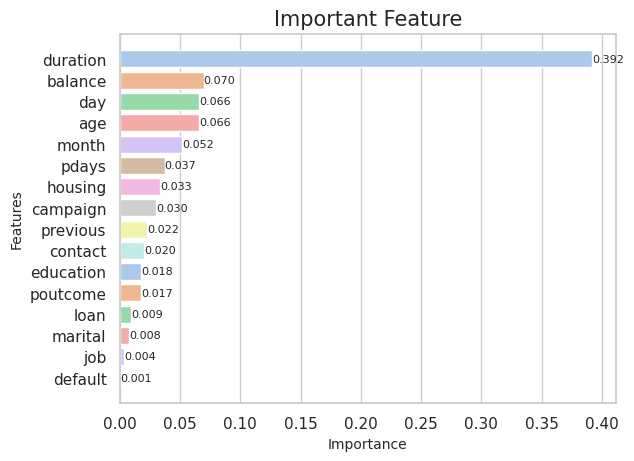

In [ ]:
# plot the feature importance:
sns.set(style="whitegrid")

ax = sns.barplot(x = 'importance', y = 'feature', data = feature_imp_df, palette='pastel')

for c in ax.containers:
  ax.bar_label(container=c,label_type='edge',fontsize=8,fmt='%.3f')
plt.title('Important Feature', fontsize = 15)
plt.xlabel('Importance', fontsize = 10)
plt.ylabel('Features', fontsize = 10)
plt.plot()


**Observation:**
- The most influencing feature is 'duration',folowed by 'balance','day','age' and 'month'.

###**Model Evaluation:Test Data**

In [19]:
def model_evaluater(original_data,predicted_labels,predicted_probabilities):
  # Evaluate predictions
  print('Confusion Matrix:')
  print(confusion_matrix(original_data, predicted_labels))
  print("="*100)
  acc = accuracy_score(original_data, predicted_labels)
  print("accuracy: ",acc)
  print("="*100)
  f1 = f1_score(original_data, predicted_labels)
  print("f1-score: ",f1)
  print("="*100)
  roc_auc = roc_auc_score(original_data, predicted_probabilities)
  print("roc-auc: ",roc_auc )
  print("="*100)
  print(classification_report(original_data, predicted_labels))
  print("="*100)

In [20]:
from sklearn.metrics import f1_score, roc_auc_score
# Evaluate the best model on the test data
y_test_pred_labels = loaded_model.predict(X_test)
y_test_pred_proba = loaded_model.predict_proba(X_test)[:, 1]

print("Test Evaluation by Best Model:")
model_evaluater(original_data=y_test, predicted_labels=y_test_pred_labels,
                predicted_probabilities=y_test_pred_proba)

# from sklearn.metrics import f1_score
# original_data=y_test
# predicted_labels=y_test_pred_labels
# f1 = f1_score(original_data, predicted_labels)
# print("f1-score: ",f1)


Test Evaluation by Best Model:
Confusion Matrix:
[[7470  523]
 [ 355  695]]
accuracy:  0.9029083268826716
f1-score:  0.6128747795414462
roc-auc:  0.9335729477578596
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7993
           1       0.57      0.66      0.61      1050

    accuracy                           0.90      9043
   macro avg       0.76      0.80      0.78      9043
weighted avg       0.91      0.90      0.91      9043



##**Predicting Probabilities:**

- It can be more flexible to predict probabilities of an observation belonging to each class in a classification problem rather than predicting classes directly.

- This flexibility comes from the way that probabilities may be interpreted using different thresholds that allow the operator of the model to trade-off concerns in the errors made by the model, such as the number of false positives compared to the number of false negatives. This is required when using models where the cost of one error outweighs the cost of other types of errors.

- Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are ROC Curves and Precision-Recall curves.

##**Threshold Moving: Precision-Recall Curve**

Given our specific goal of building a balanced model with less emphasis on false positives and minimizing false negatives, the Precision-Recall curve would be more appropriate for our binary classification problem.It allows us to make decisions based on the desired trade-off between precision and recall, aligning with our priorities in handling potential customers.


**Precision-Recall Curve:**
- **Appropriateness:**
  - Precision-Recall curves are particularly suitable when dealing with imbalanced datasets or scenarios where one class is more critical than the other.
  - They focus on the trade-off between precision and recall, providing insights into the model's performance across different decision thresholds.
  - Well-suited for cases where you want to control false positives and false negatives independently and find a balance between them.






In [21]:
# train data evaluation on the (loaded) best model:
y_train_pred = loaded_model.predict(X_train)
y_train_pred_proba = loaded_model.predict_proba(X_train)[:, 1] #keep only the positives
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba)

In [22]:
# Find optimal threshold for a balanced precison-recall:
# f1 score is maximum at optimal threshold.

# Calculate F1 score for each point on the curve:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the index of the maximum F1 score:
f1_max = np.max(f1_scores)
optimal_threshold_index = np.argmax(f1_scores)

# Find the optimal threshold,using the max f1 score index:
optimal_threshold = thresholds[optimal_threshold_index]

print("Optimal Threshold(Train data):", optimal_threshold)
print('f1-score(max): ',f1_max)

Optimal Threshold(Train data): 0.5837865858164708
f1-score(max):  0.9400162431836641


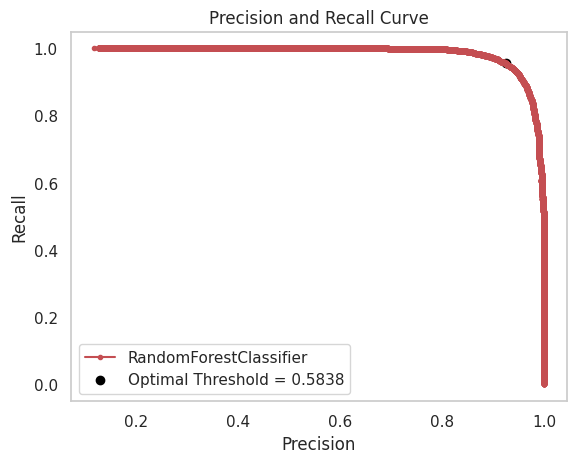

In [24]:
# plot Precision-Recall curve and its Optimal Threshold for TRAIN data:

ix = optimal_threshold_index

sns.set(style="whitegrid")
plt.plot( precisions[:-1], recalls[:-1], color = 'r',marker='.', label=f"{best_model_name}")
plt.scatter(precisions[ix],recalls[ix],  marker='o', color='black', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.title("Precision and Recall Curve", fontsize=12)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.grid()

In [25]:
# predict labels using the optimal threshold:
chosen_threshold  = optimal_threshold
y_thresh_pred_labels = (y_test_pred_proba >= chosen_threshold).astype(int)

print('Test Results: After Threshold Tuning using Precision-Recall Curve:')
print("*"*100)

model_evaluater(original_data=y_test,predicted_labels=y_thresh_pred_labels,
                predicted_probabilities=y_test_pred_proba)

Test Results: After Threshold Tuning using Precision-Recall Curve:
****************************************************************************************************
Confusion Matrix:
[[7668  325]
 [ 523  527]]
accuracy:  0.9062258100187991
f1-score:  0.5541535226077812
roc-auc:  0.9335729477578596
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7993
           1       0.62      0.50      0.55      1050

    accuracy                           0.91      9043
   macro avg       0.78      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



##**Threshold Moving: ROC-AUC:**

**AUC-ROC Curve:**
- **Appropriateness:**
  - AUC-ROC curves are useful for assessing a model's ability to discriminate between classes across various decision thresholds.
  - They are less sensitive to class imbalance and are more focused on overall model performance.it emphasizes true positive rate and false positive rate without considering the imbalance in class sizes.
- Hence,It's Less Appropriate for our business case.


###To find the optimal threshold for a balanced TruePositiveRate-FalsePositiveRate:


We can then choose the threshold with the largest **the Youden’s J statistic** value:


- the Youden’s J statistic (J) is calculated using the formula:.

      J = TruePositiveRate – FalsePositiveRate

In [ ]:
# ROC-AUC curve and its optimal threshold for TRAIN data:

# roc score:
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)

# calculate roc curves:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)

# get the best threshold:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold(AUC-ROC)=%f' % (best_thresh))

Best Threshold(AUC-ROC)=0.512061


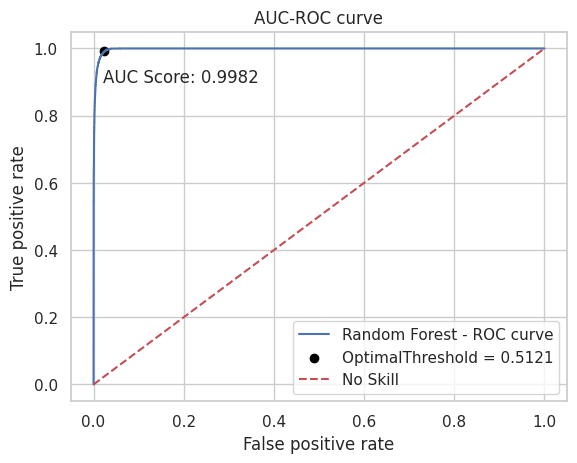

In [ ]:
# plot roc curve:
# plt.figure(figsize=(6, 3))
plt.plot(fpr, tpr, label=f'{best_model_name} - ROC curve')
plt.scatter(fpr[ix], tpr[ix], marker='o',color='black', label=f'OptimalThreshold = {best_thresh:.4f}')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.title('AUC-ROC curve', fontsize=12)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.02, 0.9, f'AUC Score: {roc_auc_train:.4f}')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# predict labels using the optimal threshold(ROC-AUC):
chosen_threshold  = best_thresh
y_thresh_pred_labels = (y_test_pred_proba >= chosen_threshold).astype(int)

print('Test Results: After Threshold Tuning using AUC-ROC Curve:')
print("*"*100)

model_evaluater(original_data=y_test,predicted_labels=y_thresh_pred_labels,
                predicted_probabilities=y_test_pred_proba)

Test Results: After Threshold Tuning using AUC-ROC Curve:
****************************************************************************************************
Confusion Matrix:
[[7503  490]
 [ 383  667]]
accuracy:  0.9034612407386929
f1-score:  0.6044404168554599
roc-auc:  0.9335729477578596
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7993
           1       0.58      0.64      0.60      1050

    accuracy                           0.90      9043
   macro avg       0.76      0.79      0.77      9043
weighted avg       0.91      0.90      0.91      9043

